## Prepare a model for glass classification using KNN

### Data Description:

+ RI:refractive index

+ Na:Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

+ Mg:Magnesium

+ AI:Aluminum

+ Si:Silicon

+ K:Potassium

+ Ca:Calcium

+ Ba:Barium

+ Fe:Iron

**Type: Type of glass:(class attribute)**
+ 1--building_windows_float_processed
+ 2--building_windows_non_float_processed
+ 3--vehicle_windows_float_processed
+ 4--vehicle_windows_non_float_processed (none in this database)
+ 5--containers
+ 6--tableware
+ 7--headlamps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
Glass_data=pd.read_csv('glass.csv')
Glass_data.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

**Data Understanding**

In [4]:
Glass_data.shape

(214, 10)

In [5]:
Glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
Glass_data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
Glass_data["Type"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [8]:
Glass_data['Type'].value_counts().sort_index(ascending=True)

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

In [9]:
Glass_data[Glass_data.duplicated()].shape

(1, 10)

In [10]:
Glass_data[Glass_data.duplicated()]

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1

In [11]:
Glass_data.describe().T

count       mean       std       min        25%       50%        75%  \
RI    214.0   1.518365  0.003037   1.51115   1.516522   1.51768   1.519157   
Na    214.0  13.407850  0.816604  10.73000  12.907500  13.30000  13.825000   
Mg    214.0   2.684533  1.442408   0.00000   2.115000   3.48000   3.600000   
Al    214.0   1.444907  0.499270   0.29000   1.190000   1.36000   1.630000   
Si    214.0  72.650935  0.774546  69.81000  72.280000  72.79000  73.087500   
K     214.0   0.497056  0.652192   0.00000   0.122500   0.55500   0.610000   
Ca    214.0   8.956963  1.423153   5.43000   8.240000   8.60000   9.172500   
Ba    214.0   0.175047  0.497219   0.00000   0.000000   0.00000   0.000000   
Fe    214.0   0.057009  0.097439   0.00000   0.000000   0.00000   0.100000   
Type  214.0   2.780374  2.103739   1.00000   1.000000   2.00000   3.000000   

           max  
RI     1.53393  
Na    17.38000  
Mg     4.49000  
Al     3.50000  
Si    75.41000  
K      6.21000  
Ca    16.19000  
Ba     3.15000  
Fe     0.51000  
Type   7.00000

###  Exploratary Data Analysis

**Outlier Detection**

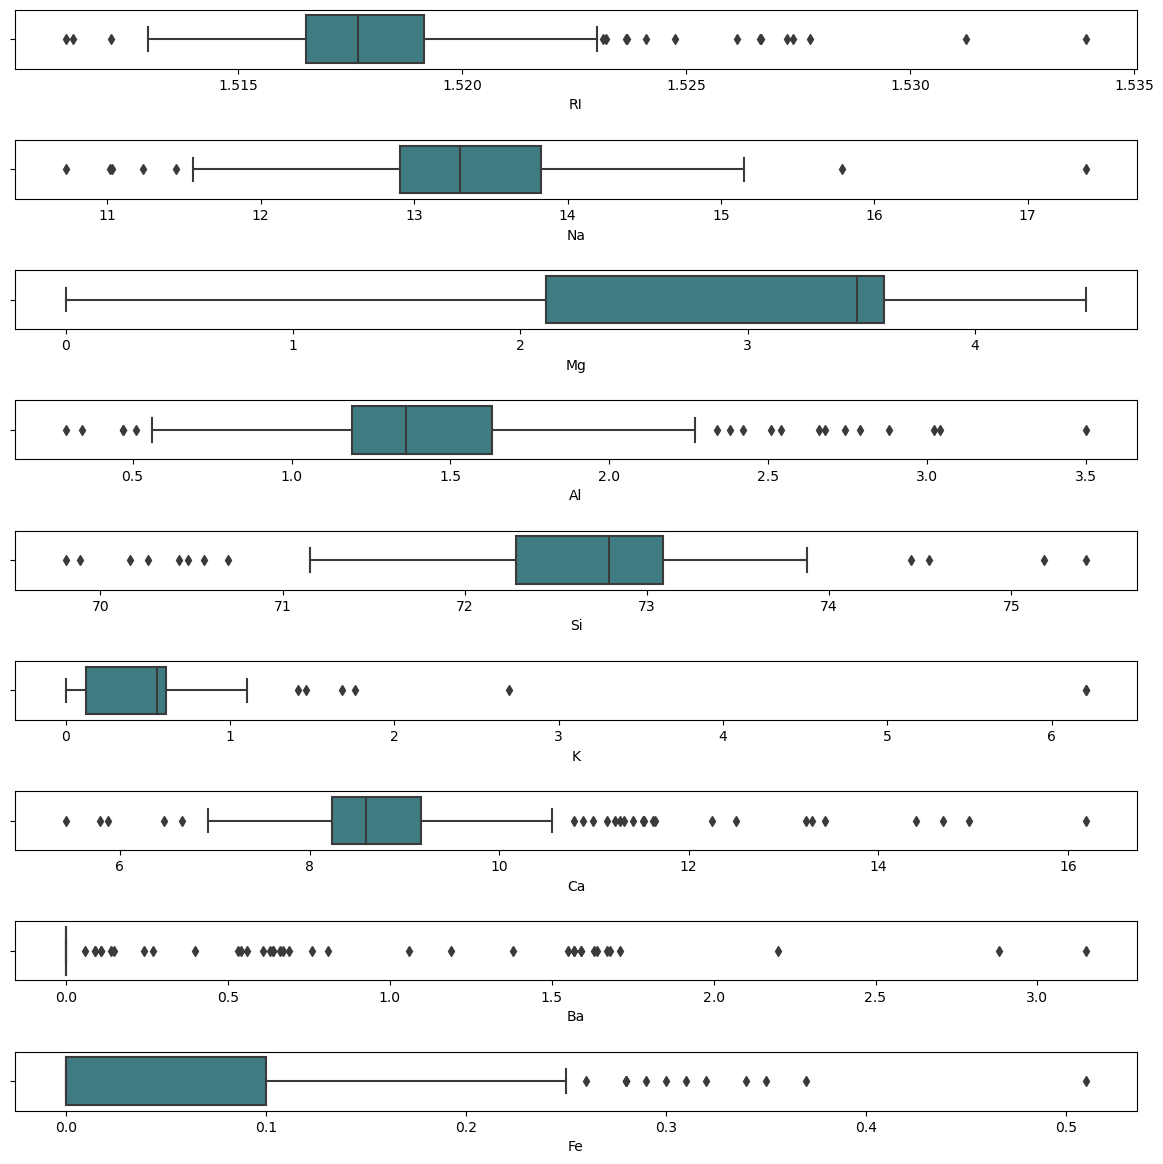

In [12]:
fig,axes=plt.subplots(9,1,figsize=(12,12),sharex=False,sharey=False)
sns.boxplot(x='RI',data=Glass_data,palette='crest',ax=axes[0])
sns.boxplot(x='Na',data=Glass_data,palette='crest',ax=axes[1])
sns.boxplot(x='Mg',data=Glass_data,palette='crest',ax=axes[2])
sns.boxplot(x='Al',data=Glass_data,palette='crest',ax=axes[3])
sns.boxplot(x='Si',data=Glass_data,palette='crest',ax=axes[4])
sns.boxplot(x='K',data=Glass_data,palette='crest',ax=axes[5])
sns.boxplot(x='Ca',data=Glass_data,palette='crest',ax=axes[6])
sns.boxplot(x='Ba',data=Glass_data,palette='crest',ax=axes[7])
sns.boxplot(x='Fe',data=Glass_data,palette='crest',ax=axes[8])
plt.tight_layout(pad=2.0)

**Distribution of Each Column**

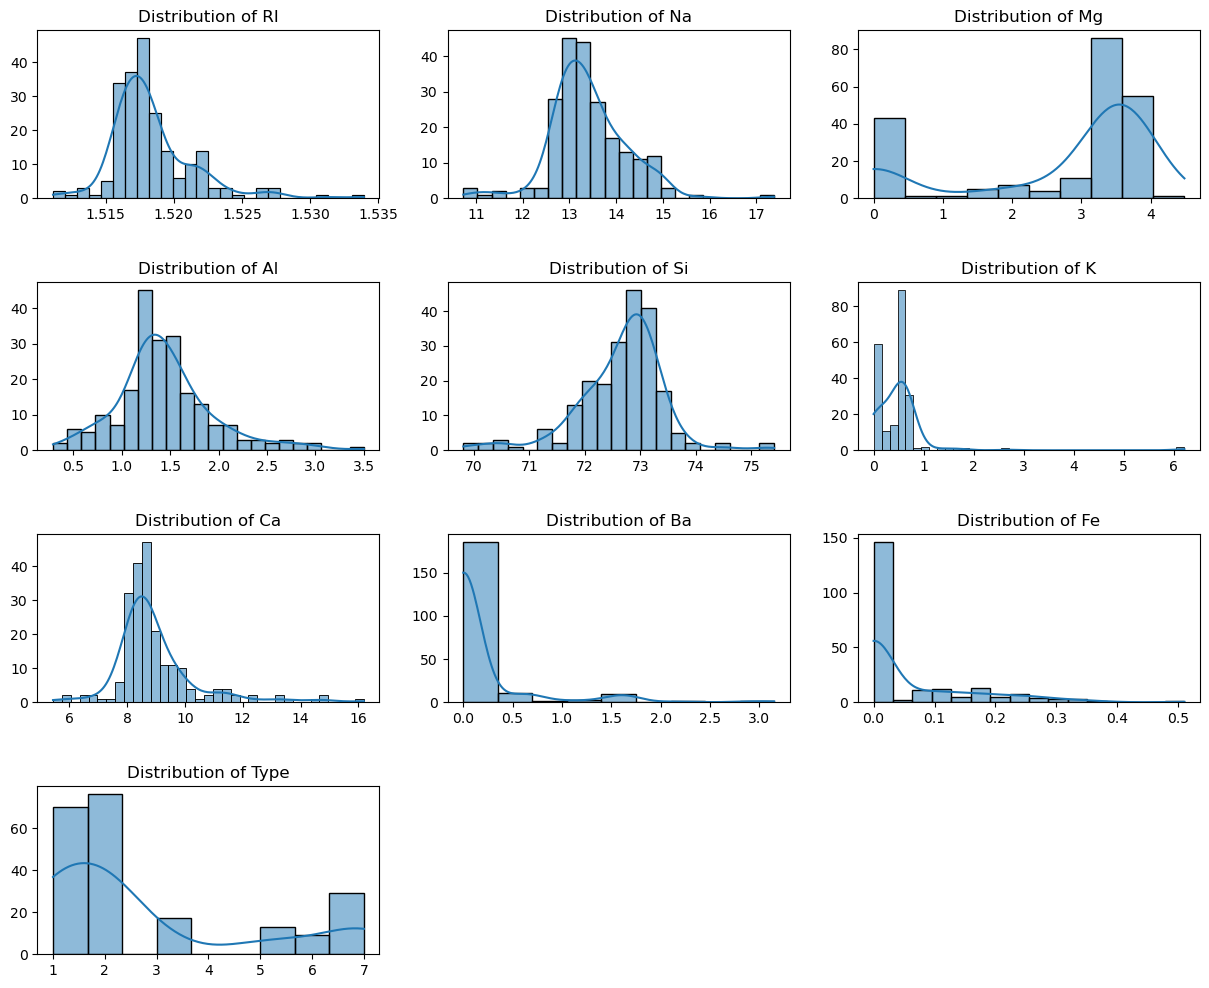

In [13]:
# Set the number of subplots and the layout of the grid
num_cols=3
num_rows=(len(Glass_data.columns)-1)//num_cols+1

# Create subplots
fig,axes=plt.subplots(num_rows,num_cols,figsize=(15,12))
fig.subplots_adjust(hspace=0.5)

# Plot distribution plots for each numeric column
for i,col in enumerate(Glass_data.columns):
    ax=axes[i//num_cols,i % num_cols]
    sns.histplot(data=Glass_data,x=col,kde=True,ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Remove empty subplots if any
if len(Glass_data.columns) % num_cols != 0:
    for i in range(len(Glass_data.columns) % num_cols,num_cols):
        fig.delaxes(axes[-1,i])

# Display the plots
plt.show()

**Cor-relation**

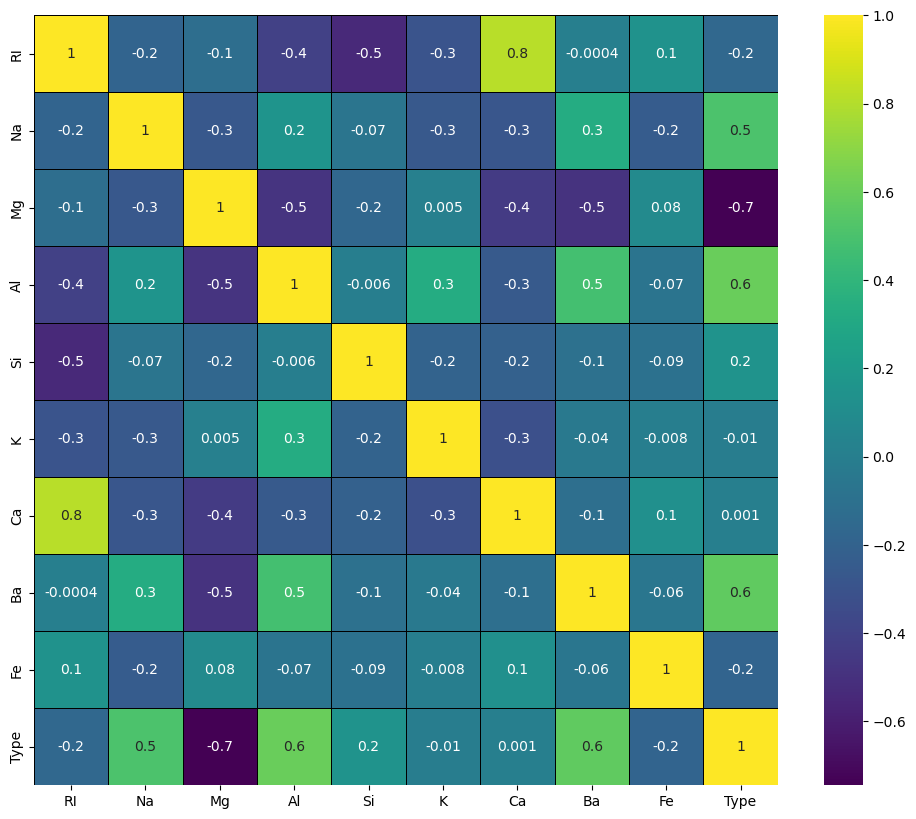

In [14]:
fig,ax=plt.subplots(figsize=(12,10))
sns.heatmap(Glass_data.corr(),annot=True,fmt='.1g',cmap="viridis",linewidths=0.5,linecolor='black');

**Pair Plot**

<Figure size 800x800 with 0 Axes>

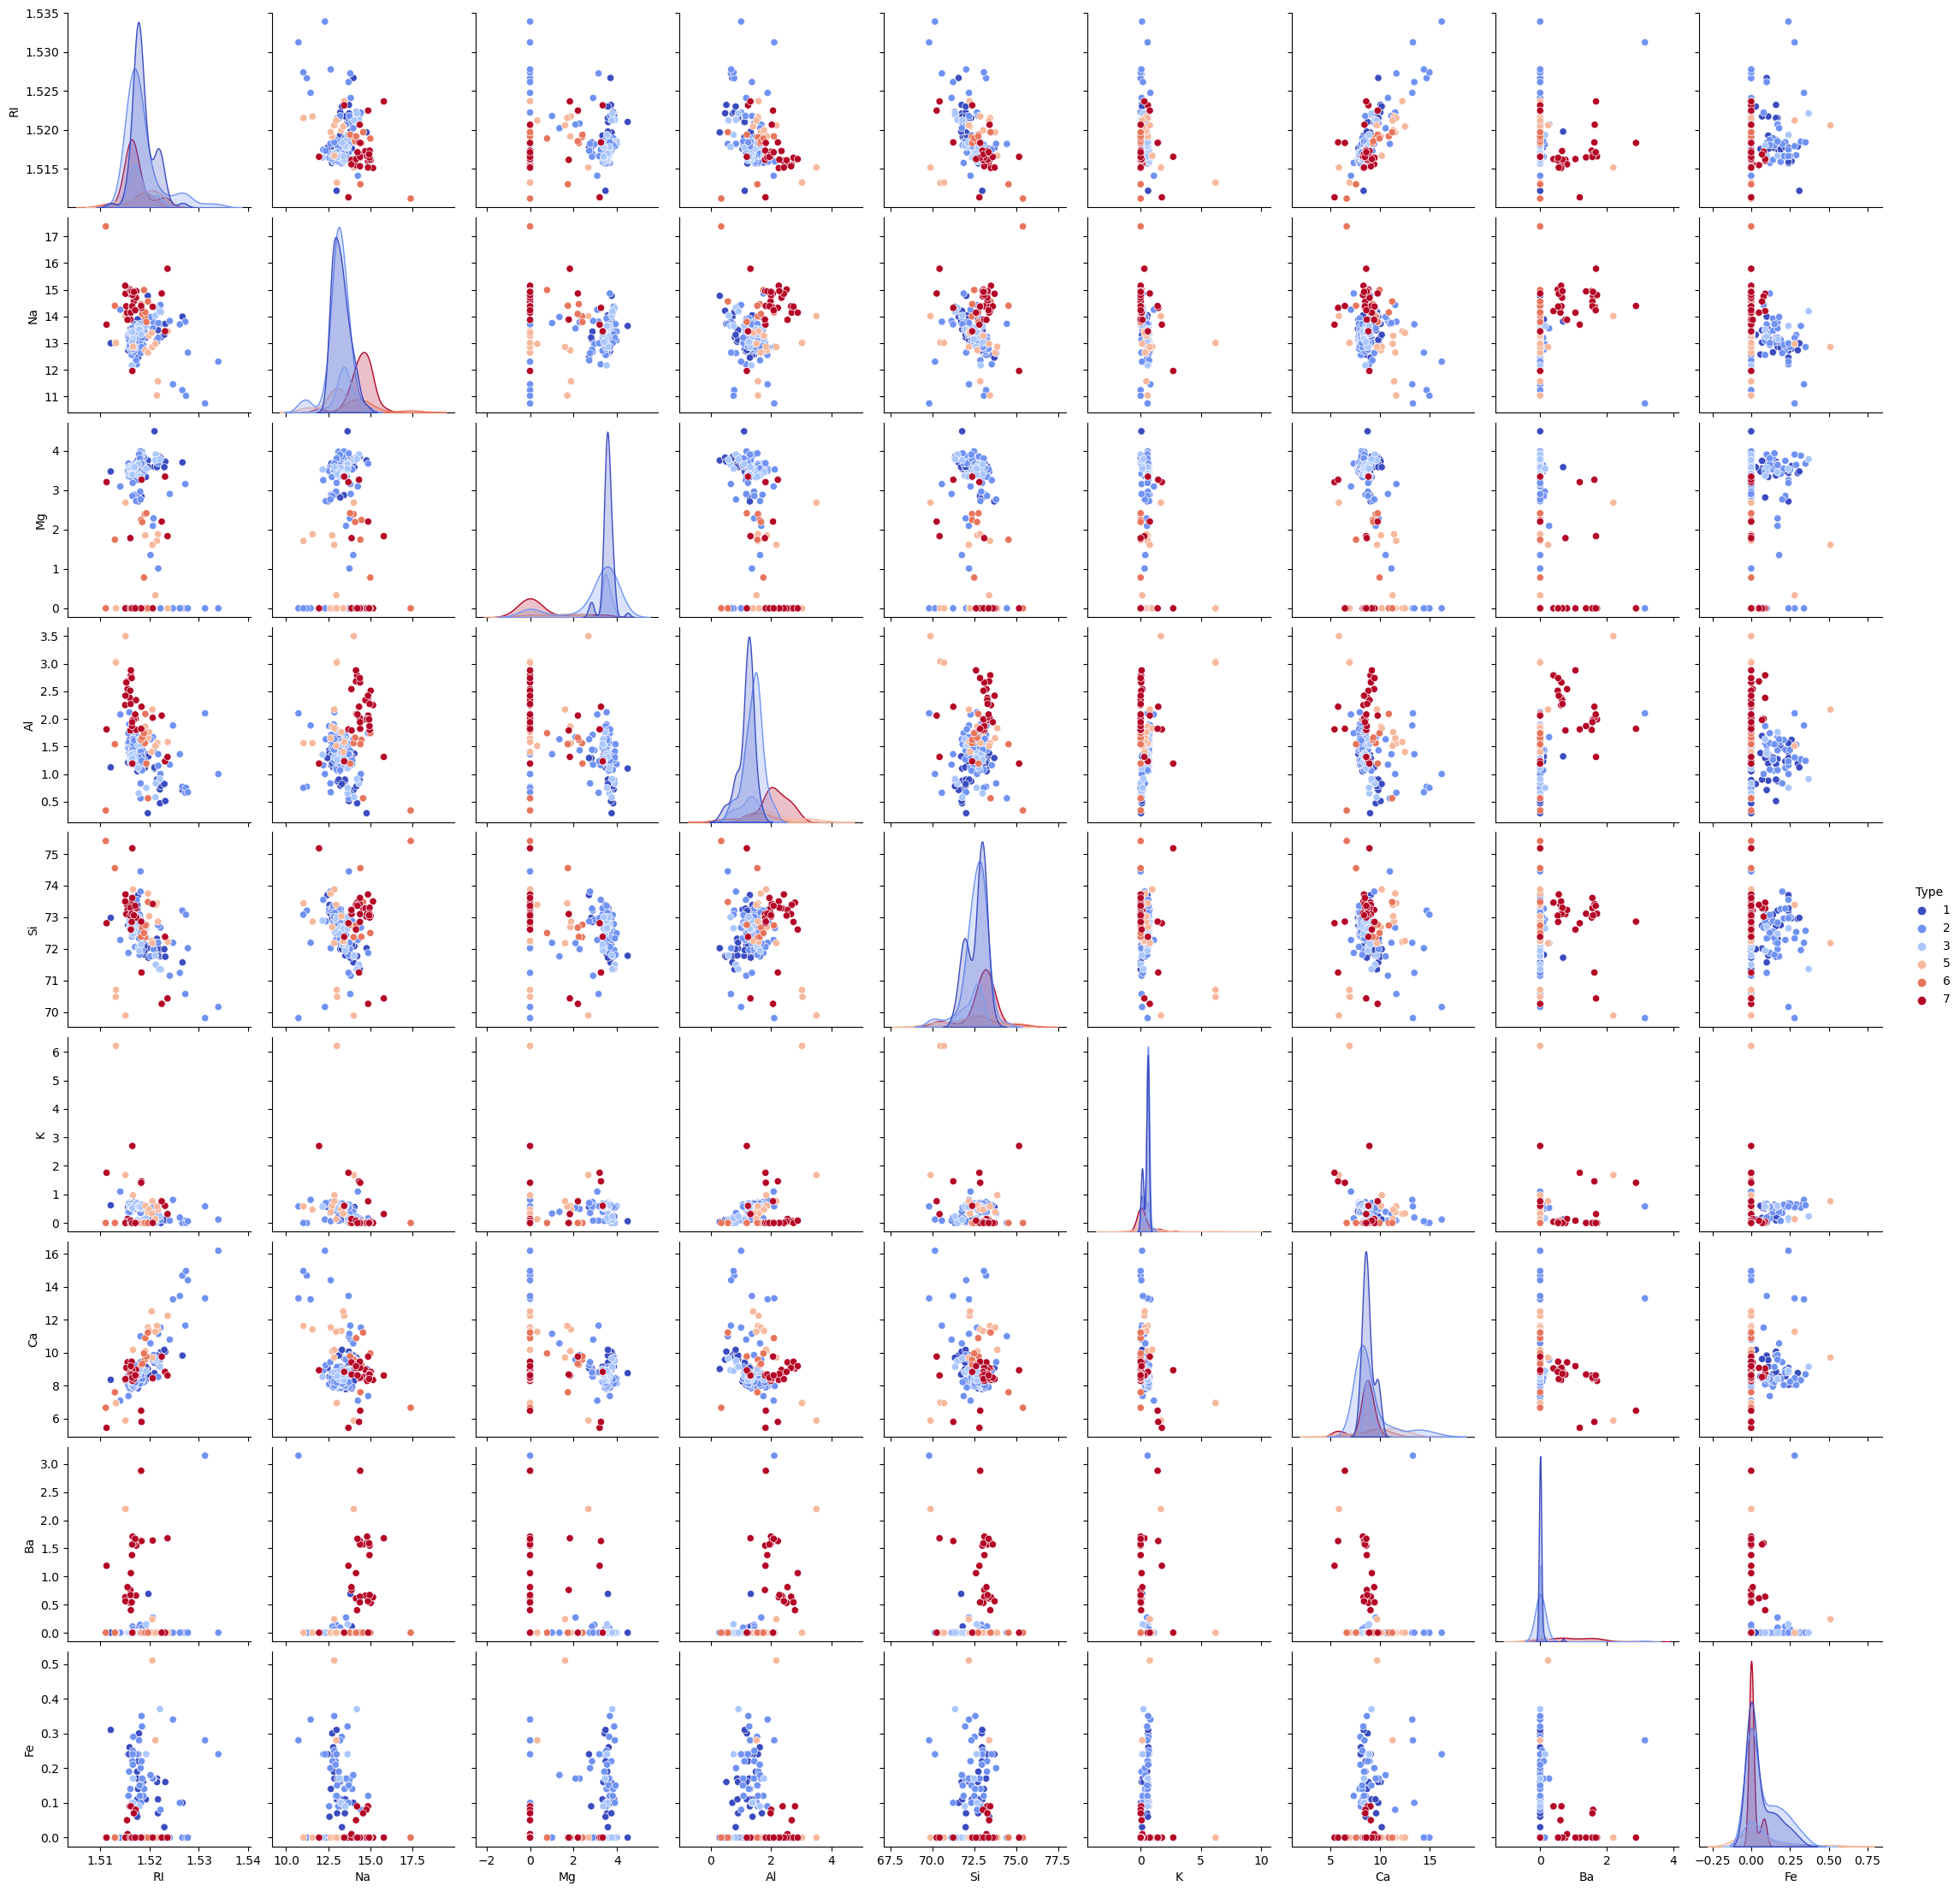

In [15]:
plt.figure(figsize=(8,8))
sns.pairplot(Glass_data,hue='Type',palette='coolwarm')
plt.show()

**Pie Chart**

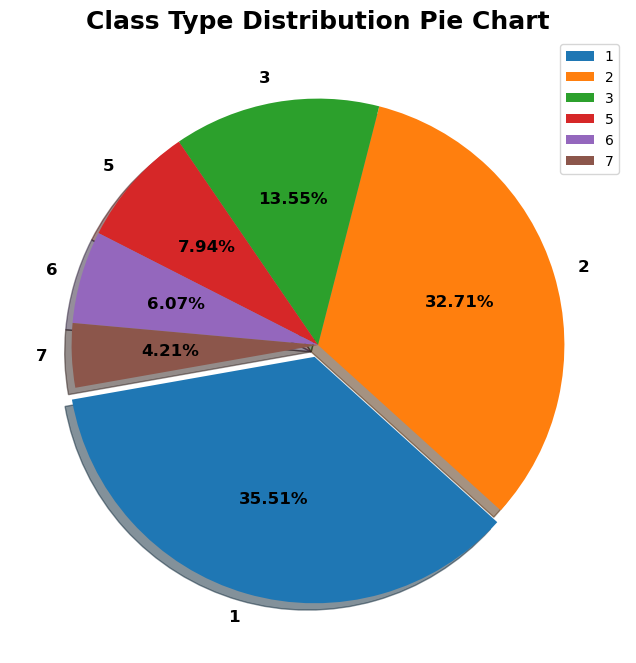

In [16]:
plt.figure(figsize=(12,8))
plt.pie(Glass_data['Type'].value_counts(),
       labels=Glass_data.Type.unique(),
       explode=[0.05,0.0,0.0,0.0,0.0,0.0],
       autopct='%.2f%%',
       shadow=True,
       startangle=190,
       textprops={'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc='upper right')
plt.title("Class Type Distribution Pie Chart",fontsize=18,fontweight='bold')
plt.show()

### Data Pre-processing

**Removing Duplicates**

In [17]:
Glass_data.drop_duplicates(inplace=True)

**Removing Outliers**

In [18]:
from collections import Counter

In [19]:
# Detect observations with more than one outlier
features=Glass_data.columns[:-1].tolist()
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices=[]
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        Q1=np.percentile(df[col],25) # 1st quartile (25%)
        Q3=np.percentile(df[col],75) # 3rd quartile (75%)
        IQR=Q3-Q1 # Interquartile rrange (IQR)
        outlier_step=1.5*IQR # outlier step
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col=df[(df[col]<Q1-outlier_step)|(df[col]>Q3+outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices=Counter(outlier_indices)        
    multiple_outliers=list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(Glass_data[features])))) 

The dataset contains 14 observations with more than 2 outliers


In [20]:
outlier_indices=outlier_hunt(Glass_data[features])
df=Glass_data.drop(outlier_indices).reset_index(drop=True)
print(df.shape)
df.head()

(199, 10)


RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

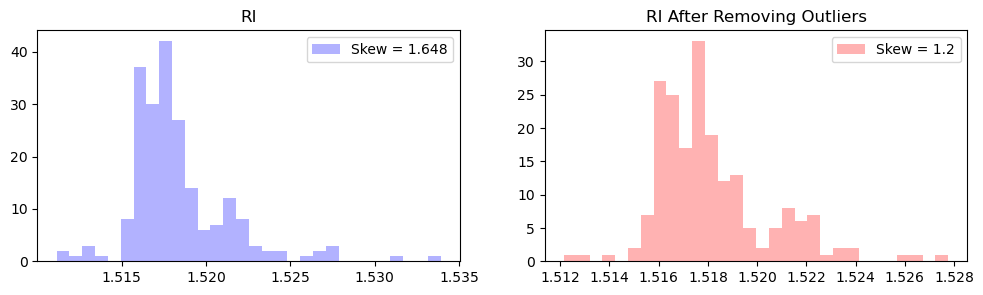

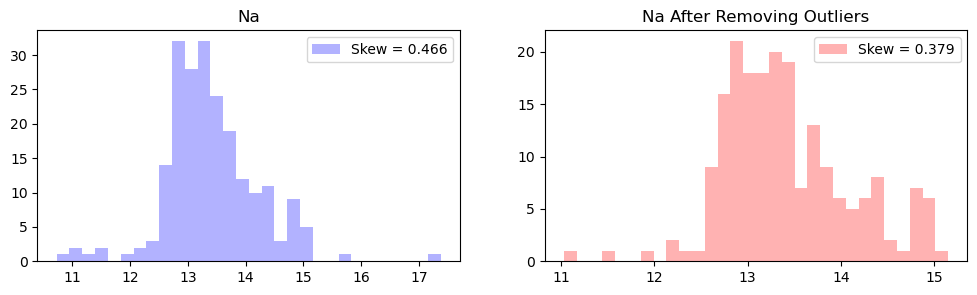

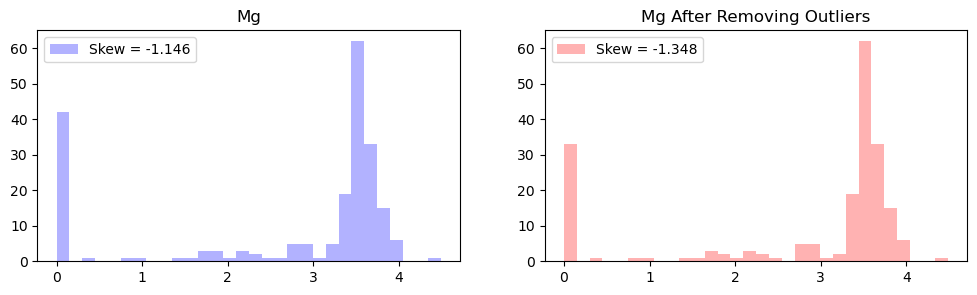

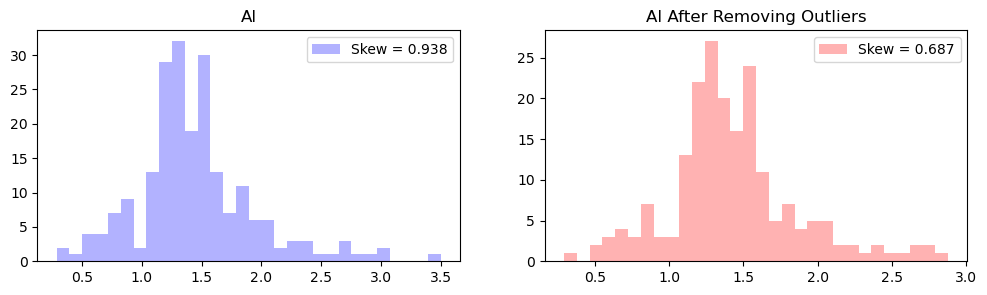

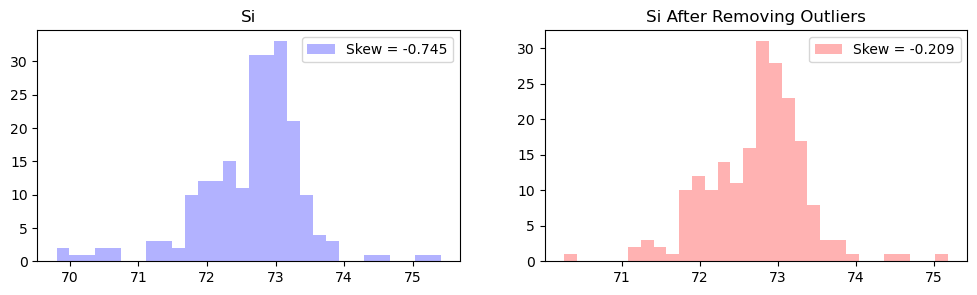

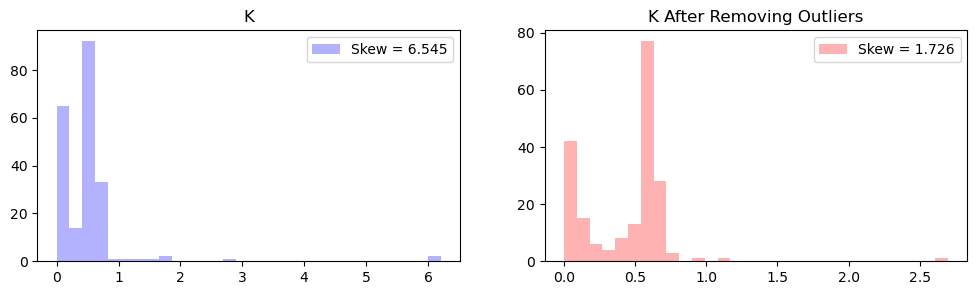

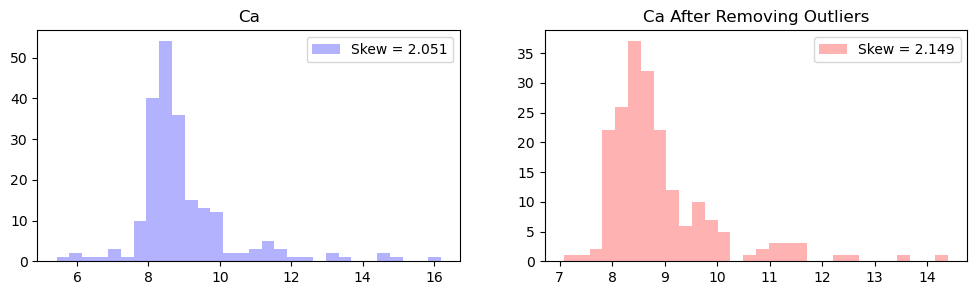

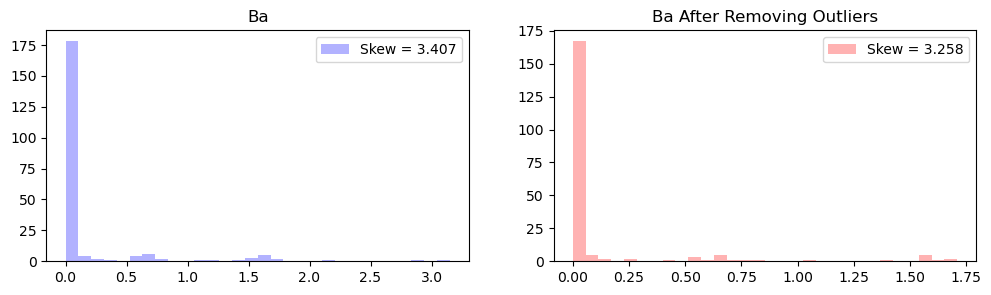

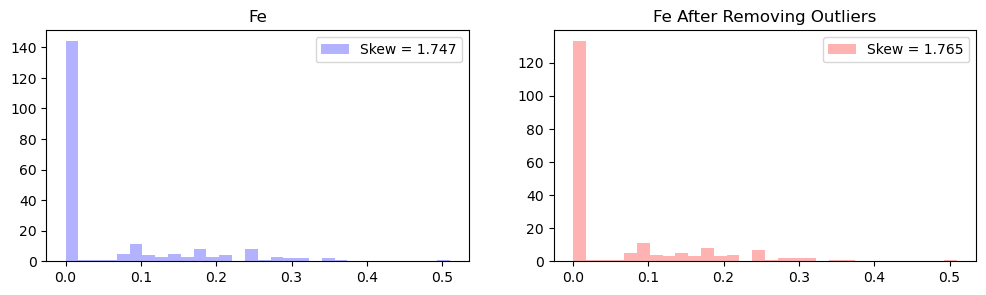

In [21]:
for feature in features:
    fig,ax=plt.subplots(1,2,figsize=(12,3))    
    ax[0].hist(Glass_data[feature],color='blue',bins=30,alpha=0.3,label='Skew = %s' %(str(round(Glass_data[feature].skew(),3))))
    ax[0].set_title(str(feature))   
    ax[0].legend(loc=0)
    
    ax[1].hist(df[feature],color='red',bins=30,alpha=0.3,label='Skew = %s' %(str(round(df[feature].skew(),3))))
    ax[1].set_title(str(feature)+' After Removing Outliers')
    ax[1].legend(loc=0)
    plt.show()

In [23]:
#pip install dataprep

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 9.9/9.9 MB 6.2 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 1.8/1.8 MB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 133.6/133.6 kB 8.2 MB/s eta 0:00:00
     ---------------------------------------- 96.1/96.1 kB 5.7 MB/s eta 0:00:00
     -------------------------------------- 158.6/158.6 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 273.3/273.3 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 7.1 MB/s eta 0:00:00
     -------------------------------------- 327.1/327.1 kB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 61.7/61.7 kB 3.4 MB/s eta 0:00:00
     -----------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


In [24]:
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split

###  Train Test Split 

In [25]:
x=df.drop('Type',axis=1)
y=df[['Type']]

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [27]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (139, 9)
Shape of X_test:  (60, 9)
Shape of y_train:  (139, 1)
Shape of y_test (60, 1)


**Standardize the Variables**

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

**Grid search for choosing the best Value of K**

In [29]:
# Get score for different values of n
k_list=np.arange(1,40,2)
mean_scores=[]
accuracy_list=[]
error_rate=[]

for i in k_list:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    pred_i=pred_i.reshape(60,1)
    score=cross_val_score(knn,x_train,y_train,cv=10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

In [30]:
n_neighbors=np.array([2*i+1 for i in range(1,20)])
param_grid=dict(n_neighbors=n_neighbors)
n_neighbors

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])

In [31]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv =10)
grid.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [32]:
print(grid.best_score_)
print(grid.best_params_)

0.6634210526315789
{'n_neighbors': 3}


**Visualizing the CV results**

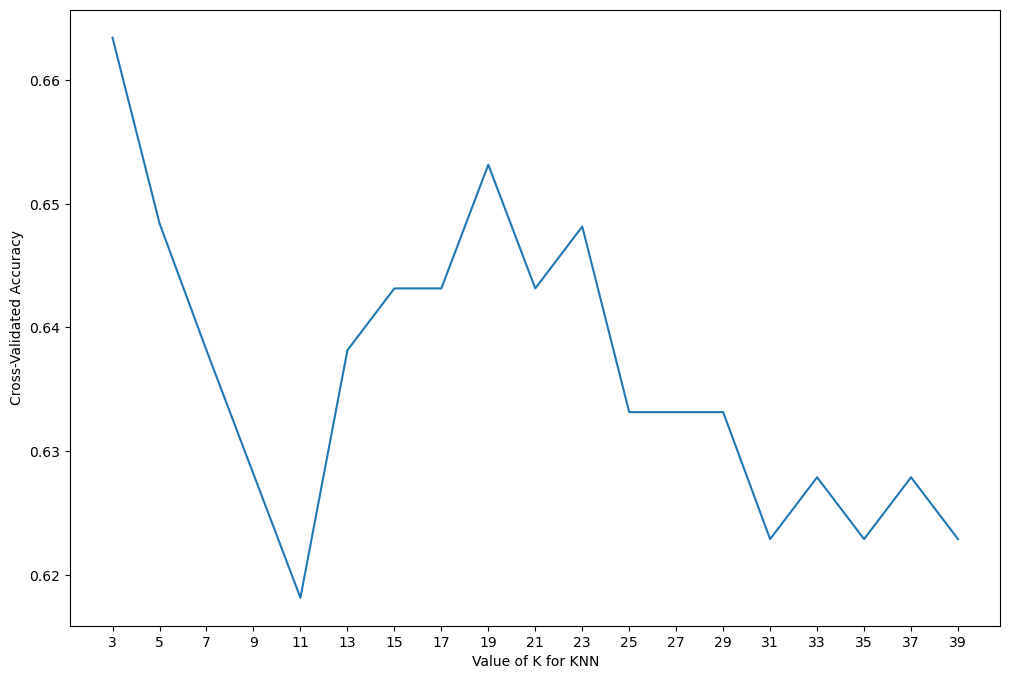

In [33]:
# choose k between 1 to 40
k_range=np.array([2*i+1 for i in range(1,20)])
k_scores=[]
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(12,8))
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

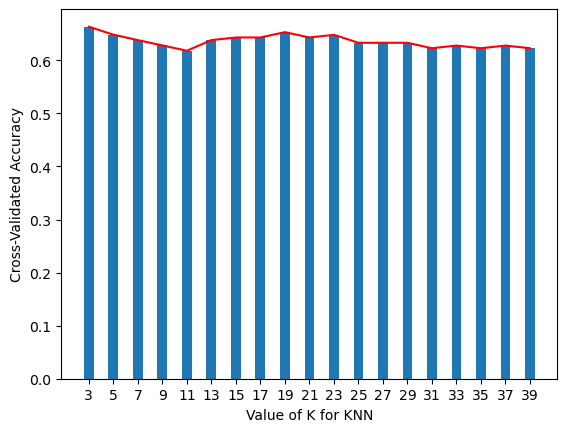

<Figure size 1200x800 with 0 Axes>

In [34]:
# choose k between 1 to 20
k_range=[2*i+1 for i in range(1,20)]
k_scores=[]
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range,k_scores)
plt.plot(k_range,k_scores,color='red')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.figure(figsize=(12,8))
plt.show()

Text(0, 0.5, 'Error Rate')

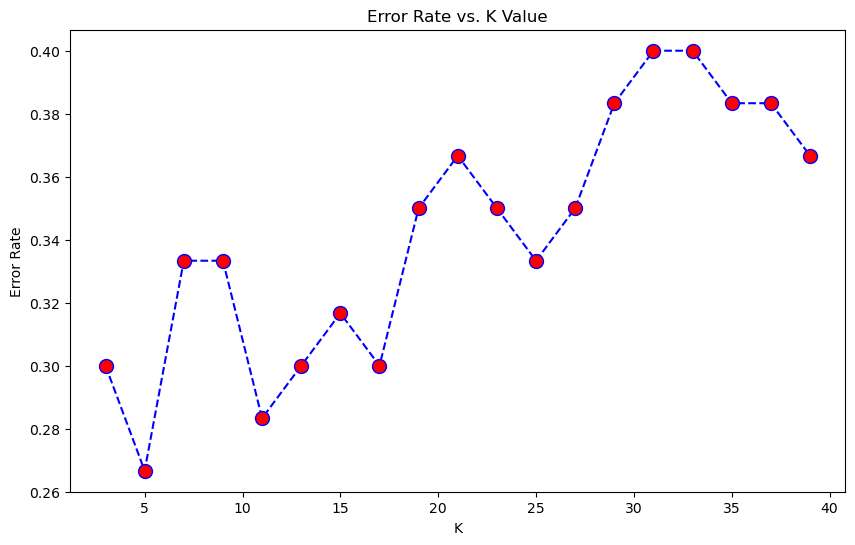

In [35]:
error_rate=[]

# Will take some time
k_range=[i for i in range(3,40,2)]
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    pred_i=pred_i.reshape(60,1)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot([i for i in range(3,40,2)],error_rate,color='blue',linestyle='dashed',marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

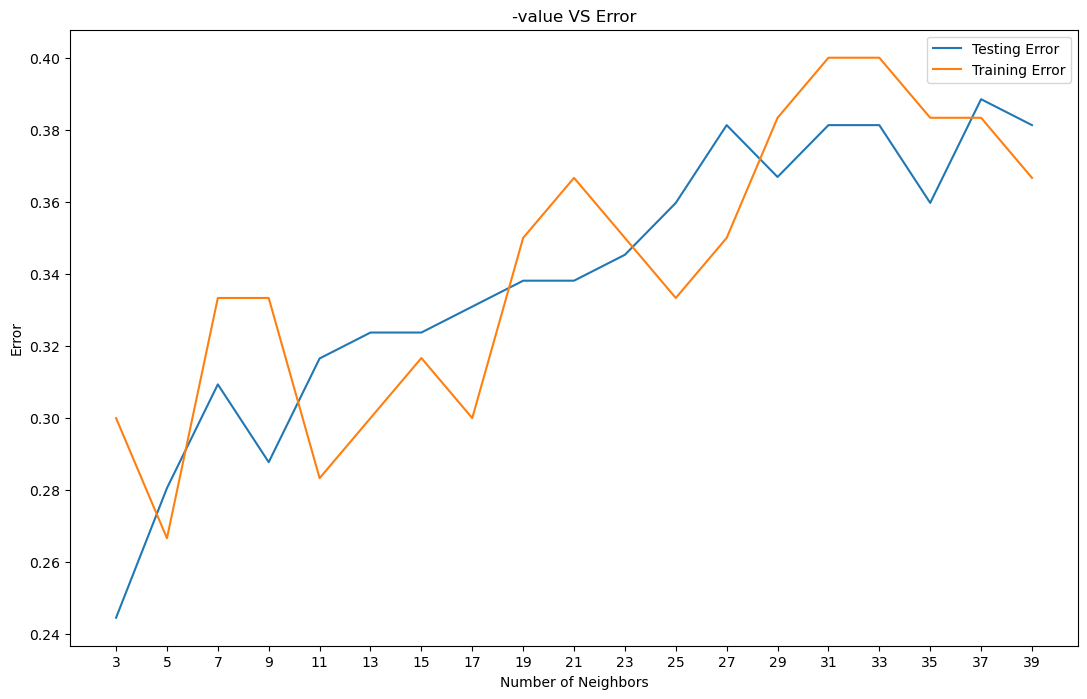

In [37]:
error1=[]
error2=[]
k_range=[i for i in range(3,40,2)]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1=knn.predict(x_train)
    y_pred1=y_pred1.reshape(-1,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2=knn.predict(x_test)
    y_pred2=y_pred2.reshape(60,1)
    error2.append(np.mean(y_test!= y_pred2))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range,error1,label='Testing Error')
plt.plot(k_range,error2,label='Training Error')
plt.legend()
plt.title('-value VS Error')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.xticks(k_range)
plt.show()

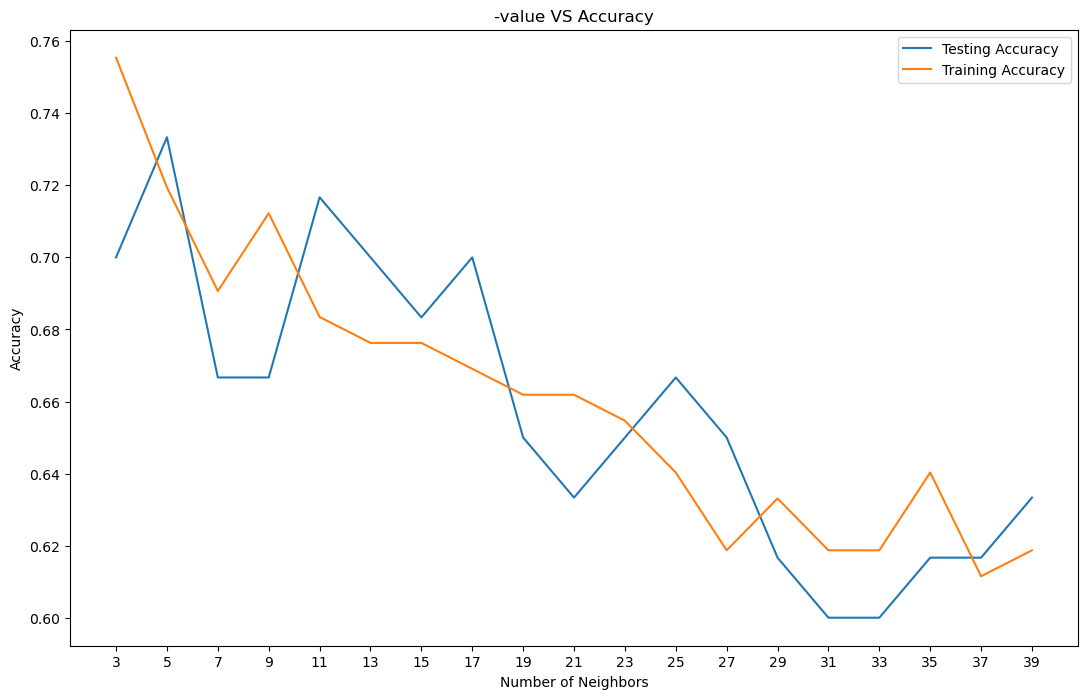

In [38]:
train_accuracy=[]
test_accuracy=[]

k_range=[i for i in range(3,40,2)]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train,y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test,y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range,test_accuracy,label='Testing Accuracy')
plt.plot(k_range,train_accuracy,label='Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.show()

**Applying KNN using K=3**

In [39]:
# NOW WITH K=3
knn=KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

knn.fit(x_train,y_train)
pred=knn.predict(x_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[18  4  0  0  0  0]
 [ 6 12  0  1  0  0]
 [ 6  0  0  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]


              precision    recall  f1-score   support

           1       0.60      0.82      0.69        22
           2       0.71      0.63      0.67        19
           3       0.00      0.00      0.00         6
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         7

    accuracy                           0.70        60
   macro avg       0.68      0.70      0.68        60
weighted avg       0.64      0.70      0.66        60



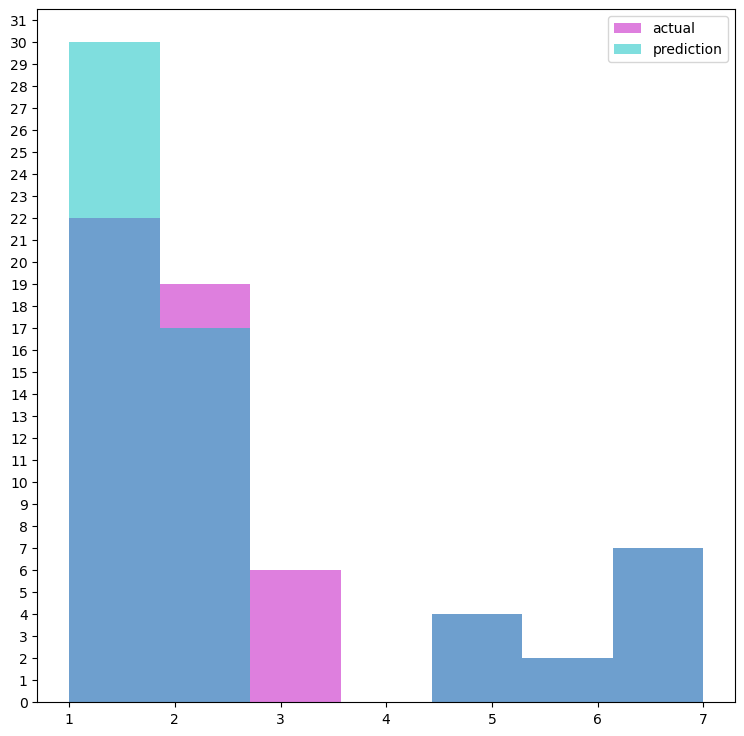

In [40]:
plt.rcParams['figure.figsize']=(9,9) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,32))
ax.legend(loc = 'best')
plt.show()

In [41]:
# Fitting classifier to the Training set
from sklearn.pipeline import Pipeline
classifier_knn = KNeighborsClassifier()
steps = [
    ('model', KNeighborsClassifier())
]
knn_pipe = Pipeline(steps)

In [42]:
parameters = { 'model__algorithm' : ['brute'],
               'model__leaf_size' : [30,50,70,90,110],
               'model__metric' : ['minkowski'],
               'model__p' : [1],
               'model__n_neighbors' : [3,5,11,19],
               'model__weights' : ['uniform', 'distance'],
               'model__n_jobs' : [-1]
}
classifier_knn=GridSearchCV(knn_pipe, parameters, cv = 10)
classifier_knn=classifier_knn.fit(x_train, y_train.values.ravel())

In [43]:
y_pred_knn_train=classifier_knn.predict(x_train)
accuracy_knn_train=accuracy_score(y_train, y_pred_knn_train)
print("Training set Accuracy: ", accuracy_knn_train)

y_pred_knn_test=classifier_knn.predict(x_test)
accuracy_knn_test=accuracy_score(y_test, y_pred_knn_test)
print("Test set Accuracy: ", accuracy_knn_test)

Training set Accuracy:  1.0
Test set Accuracy:  0.7833333333333333


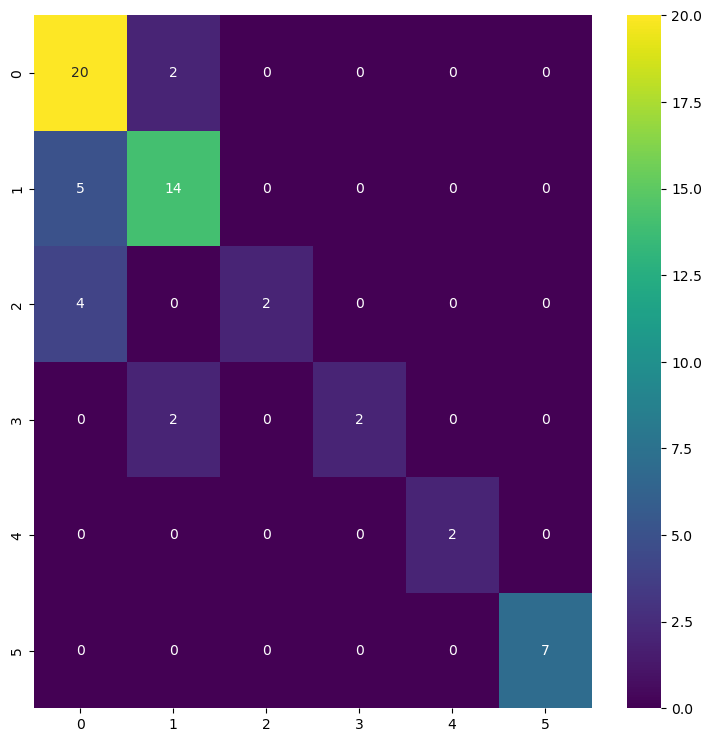

In [44]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

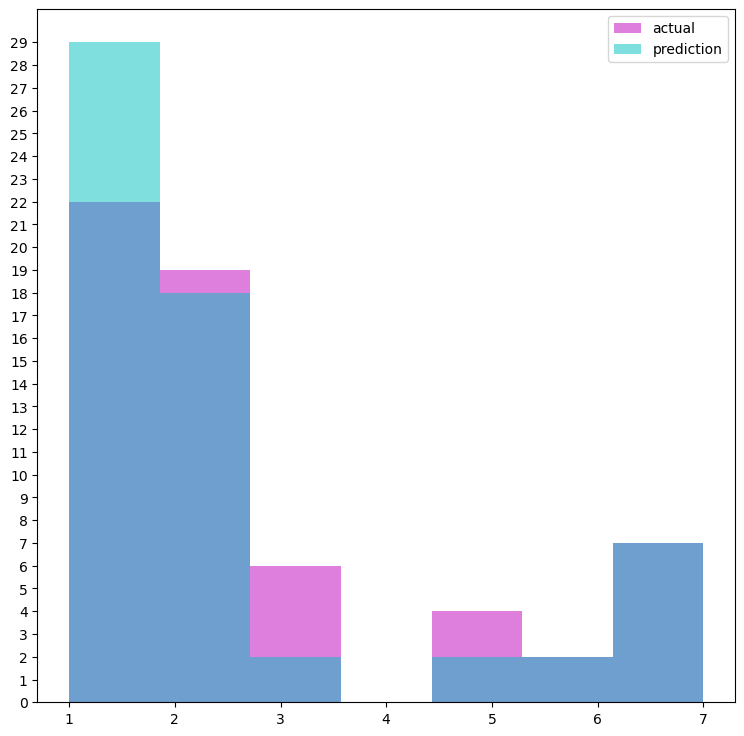

In [45]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred_knn_test, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,30))
ax.legend(loc = 'best')
plt.show()